In [1]:
import numpy as np
import pandas as pd

In [2]:
#loading the dataset
df=pd.read_csv('/kaggle/input/bundesliga-soccer-player/bundesliga_player.csv')
df.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


In [3]:
#checking for missing values in the dataset
df.isna().sum()

Unnamed: 0            0
name                  0
full_name           286
age                   0
height                0
nationality           0
place_of_birth        5
price                 5
max_price             5
position              0
shirt_nr              0
foot                  9
club                  0
contract_expires     34
joined_club           0
player_agent         27
outfitter           322
dtype: int64

In [8]:
def preprocess_inputs(df):
    df=df.copy()
    #dropping the unnamed column
    df=df.drop(df.columns[0],axis=1)
    return df

In [9]:
x=preprocess_inputs(df)
x

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.00,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.00,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.90,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.30,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.00,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Takuma Asano,浅野 拓磨,28,1.73,Japan,"Komono, Mie",4.00,4.0,Attack - Right Winger,11,right,VfL Bochum,2024-06-30,2021-07-01,JEB ENTERTAINMENT ...,adidas
511,Philipp Hofmann,NaN,30,1.95,Germany,Arnsberg,2.50,2.5,Attack - Centre-Forward,33,left,VfL Bochum,2024-06-30,2022-07-01,ROOF,NaN
512,Simon Zoller,Simon Martin Zoller,31,1.79,Germany,Friedrichshafen,1.10,3.0,Attack - Centre-Forward,9,right,VfL Bochum,2024-06-30,2019-01-01,GoalSky,Puma
513,Silvère Ganvoula,Silvère Ganvoula M'boussy,26,1.91,Congo,Brazzaville,0.75,2.5,Attack - Centre-Forward,35,right,VfL Bochum,2023-06-30,2019-07-05,BY Sport Consulting,Puma


<AxesSubplot: >

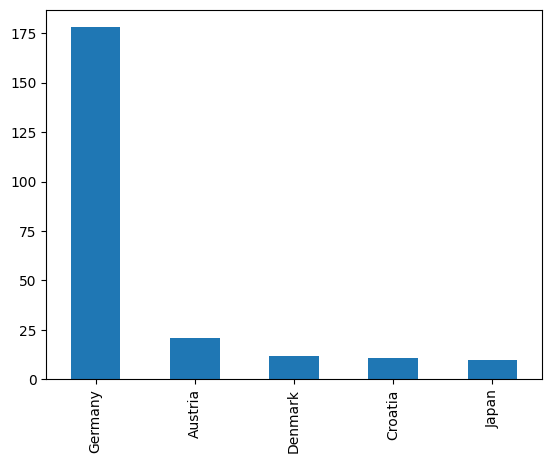

In [12]:
df['nationality'].value_counts().head().plot(kind='bar')

<AxesSubplot: >

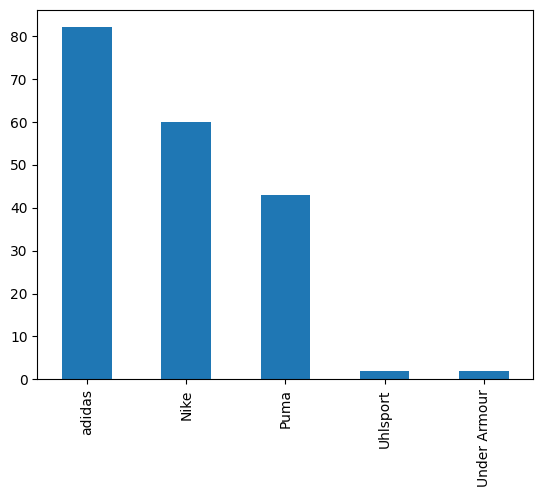

In [14]:
df['outfitter'].value_counts().head().plot(kind='bar')

In [25]:
x.loc[df['price']==np.max(df['price'])]

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
47,Jude Bellingham,Jude Victor William Bellingham,19,1.86,England,Stourbridge,120.0,120.0,midfield - Central Midfield,22,right,Bor. Dortmund,2025-06-30,2020-07-23,NaN,adidas


<AxesSubplot: ylabel='outfitter'>

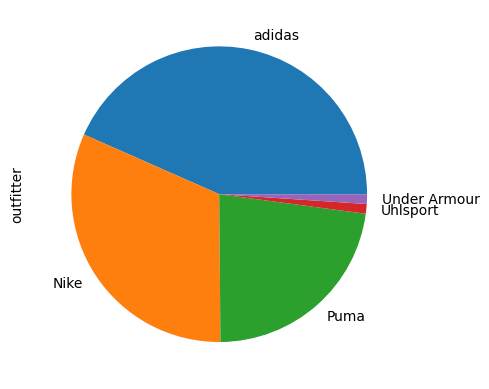

In [28]:
df['outfitter'].value_counts().head().plot(kind='pie')

In [30]:
np.mean(df['height'])*3.28

6.0601662135922325

<AxesSubplot: >

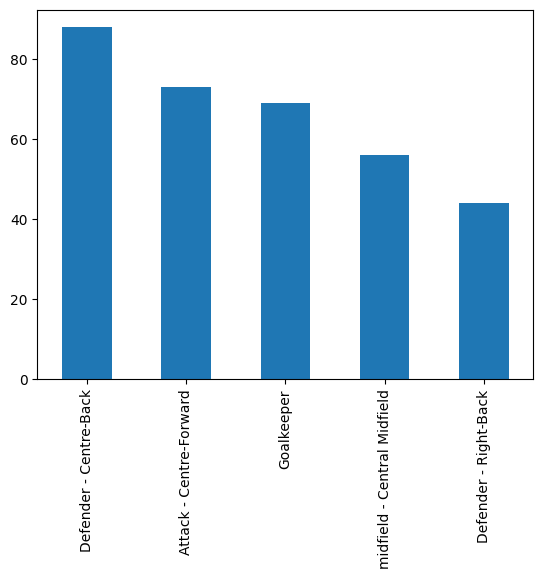

In [33]:
df['position'].value_counts().head().plot(kind='bar')

<AxesSubplot: >

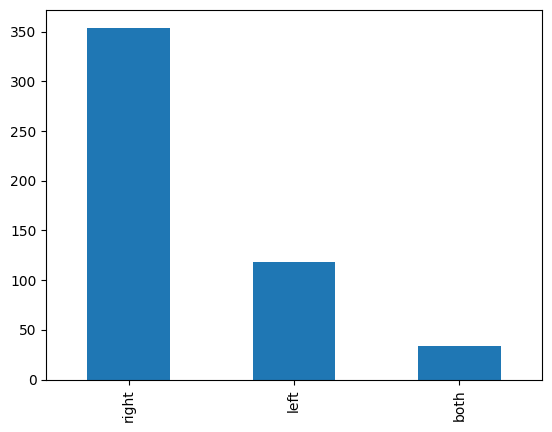

In [36]:
df['foot'].value_counts().plot(kind='bar')

In [40]:
x.loc[df['foot']=='both']

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
12,Josip Stanisic,Josip Stanišić,23,1.87,Croatia Germany,München,12.000,12.00,Defender - Right-Back,44,both,Bayern Munich,2026-06-30,2021-08-01,BALLWERK Sports GmbH,adidas
63,Jonas Nickisch,NaN,18,1.90,Germany,Dresden,0.200,0.20,Goalkeeper,1,both,RB Leipzig U19,2023-06-30,2021-07-01,neblung ...,NaN
72,Sanoussy Ba,NaN,19,1.84,Germany Senegal,Hof,0.500,0.50,Defender - Left-Back,25,both,RB Leipzig,2025-06-30,2022-07-01,Sports360 GmbH,NaN
113,Sardar Azmoun,سردار آزمون,28,1.86,Iran,"Gonbad-e Kavus, Golestan",12.000,25.00,Attack - Centre-Forward,9,both,B. Leverkusen,2027-06-30,2022-01-30,Epic Sports,Nike
115,Diant Ramaj,NaN,21,1.89,Germany Kosovo,Stuttgart,0.750,0.75,Goalkeeper,40,both,E. Frankfurt,2027-06-30,2021-07-01,BMS Sportconsulting ...,NaN
163,Conor Noß,NaN,22,1.81,Ireland Germany,Düsseldorf,0.700,0.70,midfield - Attacking Midfield,34,both,Bor. M'gladbach,2024-06-30,2021-07-01,B360 Sports,adidas
172,Pavao Pervan,NaN,35,1.94,Austria,Livno,0.400,0.80,Goalkeeper,12,both,VfL Wolfsburg,2024-06-30,2018-07-01,ROOF,NaN
181,Kilian Fischer,NaN,22,1.82,Germany,Miltenberg,2.000,2.00,Defender - Right-Back,2,both,VfL Wolfsburg,2027-06-30,2022-07-01,Robert Schneider,NaN
196,Mark Flekken,NaN,29,1.95,Netherlands,Bocholtz,7.000,7.00,Goalkeeper,26,both,SC Freiburg,NaN,2018-07-01,SEG,NaN
208,Yannik Keitel,NaN,23,1.86,Germany,Breisach am Rhein,4.000,4.00,midfield - Defensive Midfield,14,both,SC Freiburg,2024-06-30,2020-04-16,Unique Sports Group,NaN


In [41]:
np.mean(df['age'])

25.683495145631067

<AxesSubplot: >

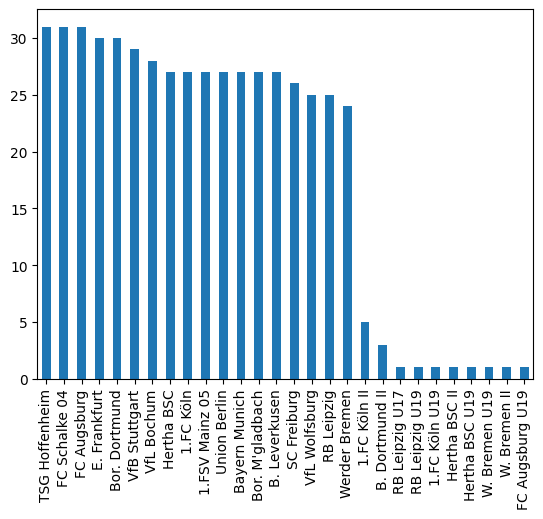

In [43]:
df['club'].value_counts().plot(kind='bar')